In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [36]:
steelers_csvs = os.listdir('Steelers_CSVs')
steelers_dfs = [pd.read_csv('Steelers_CSVs/'+csv) for csv in steelers_csvs]

for df in steelers_dfs:
    df['Date'] = pd.to_datetime(df['Date'])
    
mega_Steelers_df = pd.concat(steelers_dfs)

In [37]:
steelers_dfs[0].head() # 0 = Bears #

,Unnamed: 0,ID,Date,User,Tweet,HashTags,Likes,Retweets,MentionUsers,LocationCoordinates,clean_Tweet,NLTK_Sentiment_Analysis,TextBlob_Sentiment_Analysis,Compound_Sentiment_Score,Positive_Sentiment
0,0,1595205254391267328,2022-11-22 23:59:04+00:00,DesertChurro,@DreaCupcake_ Missing the Steeler beanie … I n...,"['HereWeGo', 'Steelers']",0,0,"[User(username='DreaCupcake_', id=109767600377...",NaN,missing steeler beanie need reason smile,0.0772,0.050000,0.127200,True
1,1,1595204994193534977,2022-11-22 23:58:02+00:00,Steelersdepot,"Will Najee Harris hit 1,000 yards rushing this...","['Steelers', 'NFL']",268,5,NaN,NaN,najee harris hit 1 000 yards rushing season ne...,0.0000,-0.166667,-0.166667,False
2,2,1595204707756216320,2022-11-22 23:56:54+00:00,SteelersTres60,#Steelers El equipo ha liberado al DB Quincy W...,['Steelers'],21,1,NaN,NaN,el equipo ha liberado al db quincy wilson del ps,0.3400,0.000000,0.340000,True
3,3,1595204519075479552,2022-11-22 23:56:09+00:00,Blitz_Burgh,Diontae Johnson is extremely athletic. Has all...,"['Steelers', 'NFL']",302,8,NaN,NaN,diontae johnson extremely athletic tangibles s...,-0.4939,-0.362500,-0.856400,False
4,4,1595204136768790530,2022-11-22 23:54:38+00:00,TheRealTwoSeven,@amylrohe @Blitz_Burgh @NFL @MarkMaddenX @kenn...,['Steelers'],0,0,"[User(username='amylrohe', id=28687726, displa...",NaN,actually responding chimed since steelers fire...,-0.6705,-0.200000,-0.870500,False


In [38]:
b_game_1 = steelers_dfs[0]

In [39]:
def remove_users_from_df(df, list_users):
    indxs = df[df['User'].isin(list_users)].index
    dfc = df.drop(indxs, inplace=False)
    return dfc

users = b_game_1.groupby(['User']).size().sort_values(ascending=False).head(5)
print(users)
l = list(users.index.values) 
b_game_1_c = remove_users_from_df(b_game_1,l)
b_game_1_c.groupby(['User']).size().sort_values(ascending=False).head(5)

User
Steelersdepot      423
SteelersNewsNow    303
Blitz_Burgh        232
JHartman_PIT        96
BrioniBoy12         79
dtype: int64


User
Alex_Kozora        76
B_GNation1         70
JoeSteelerFan      63
JRown32            54
CarterCritiques    53
dtype: int64

In [40]:
steelers_dfs[0].columns

Index(['Unnamed: 0', 'ID', 'Date', 'User', 'Tweet', 'HashTags', 'Likes',
       'Retweets', 'MentionUsers', 'LocationCoordinates', 'clean_Tweet',
       'NLTK_Sentiment_Analysis', 'TextBlob_Sentiment_Analysis',
       'Compound_Sentiment_Score', 'Positive_Sentiment'],
      dtype='object')

In [41]:
def make_scatter_and_pie_figure(df,fig_name,save=False):
    fig, axes = plt.subplots(2, 1, figsize=(15, 10))
    sns.set_style('whitegrid')
    #scatter
    sns.scatterplot(ax=axes[0],x=df['Date'],y=df["Compound_Sentiment_Score"],hue=df['Positive_Sentiment'])
    axes[0].set_title('Positive and Negative Sentiment Socores over Time Scatter Plot',fontsize=12)
    #pie
    true = len(df.loc[(df['Positive_Sentiment']==True)])
    false = len(df.loc[(df['Positive_Sentiment']==False)])
    axes[1].pie([false,true],labels=["Negative",'Positive'])
    axes[1].set_title('Pie Plot of Sentiment Labels',fontsize=12)
    fig.suptitle(fig_name, fontsize=20)
    if save: #save the figure
        plt.savefig(fig_name)

In [42]:
steelers_csvs

['Steelers_Game10_Bengals.csv',
 'Steelers_Game11_Colts.csv',
 'Steelers_Game1_Bengals.csv',
 'Steelers_Game2_Patriots.csv',
 'Steelers_Game3_Browns.csv',
 'Steelers_Game4_Jets.csv',
 'Steelers_Game5_Bills.csv',
 'Steelers_Game6_Bucaneers.csv',
 'Steelers_Game7_Dolphins.csv',
 'Steelers_Game8_Eagles.csv',
 'Steelers_Game9_Saints.csv',
 'Steelers_Pre_Game1_Seahawks.csv',
 'Steelers_Pre_Game2_Jaguars.csv',
 'Steelers_Pre_Game3_Lions.csv']

In [43]:
# users = steelers_dfs[0].groupby(['User']).size().sort_values(ascending=False).head(5)
# l = list(users.index.values) 
# make_scatter_and_pie_figure(remove_users_from_df(steelers_dfs[0], l), 'chiefs  Bears - Removed Users')

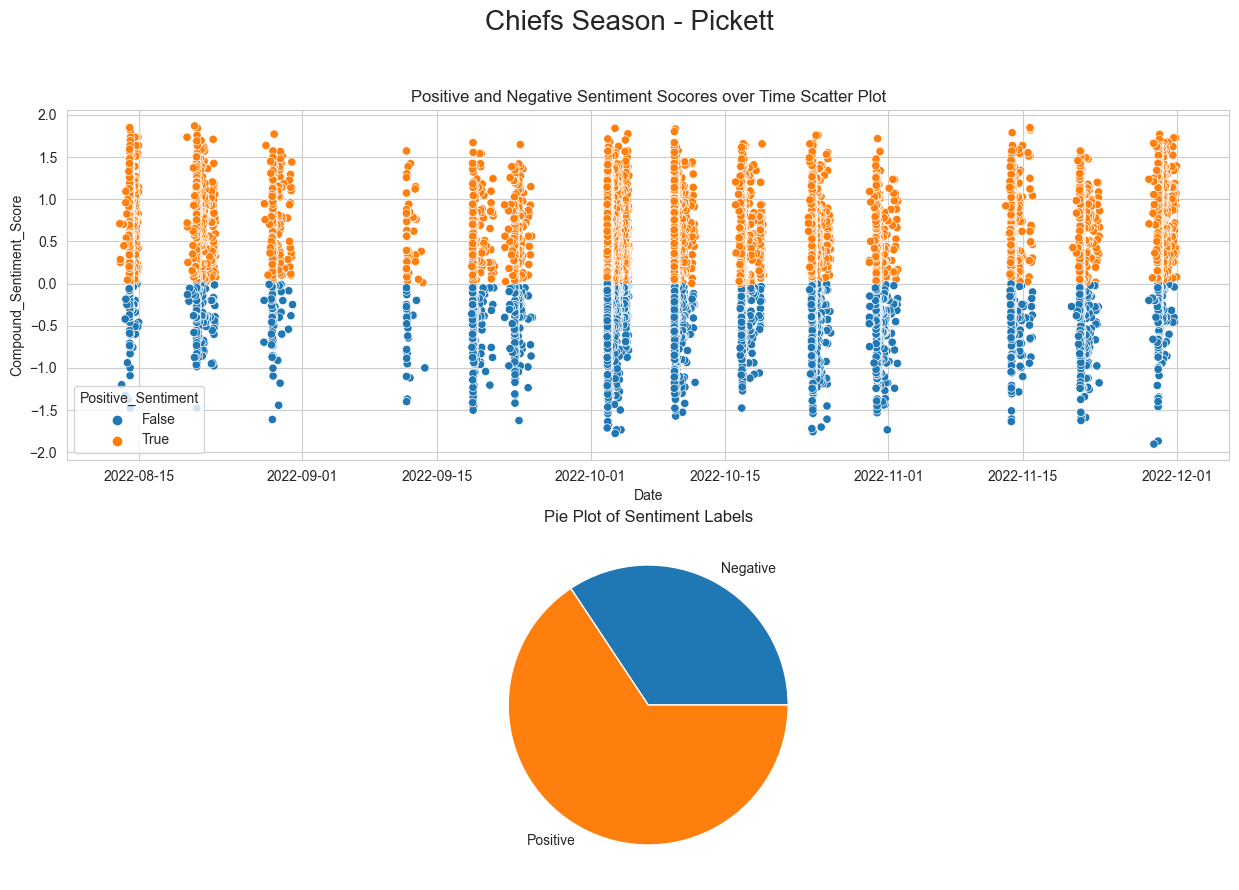

In [45]:

pickett_df3 = mega_Steelers_df.loc[mega_Steelers_df['clean_Tweet'].str.contains('pickett')]
make_scatter_and_pie_figure(pickett_df3, 'Steelers Season - Pickett')